# Tidy Finance With Python
## Chapter 3 Exercises

### Question 1

Download the monthly Fama-French factors manually from Kenneth French's [data library](https://mba.tuck.dartmouth.edu/pages/faculty/ken.french/data_library.html) and read them in via `pd.read_csv()`. Validate that you get the same data as via the `pandas_datareader package`.

In [1]:
# Imports and setup
import pandas as pd
import numpy as np

import pandas_datareader as pdr

In [2]:
start_date = "1960-01-01"
end_date = "2022-12-31"

In [3]:
# Import data via `pandas_datareader`

# factors_ff3
factors_ff3_monthly_raw = pdr.DataReader(
    name="F-F_Research_Data_Factors",
    data_source="famafrench",
    start=start_date,
    end=end_date)[0]

factors_ff3_monthly = (factors_ff3_monthly_raw
                       .divide(100)
                       .reset_index(names="month")
                       .assign(month=lambda x: pd.to_datetime(x["month"].astype(str)))
                       .rename(str.lower, axis="columns")
                       .rename(columns={"mkt-rf": "mkt_excess"})
                      )

C:\Users\jakel\AppData\Local\Temp\ipykernel_27992\1734993167.py:4: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors_ff3_monthly_raw = pdr.DataReader(
C:\Users\jakel\AppData\Local\Temp\ipykernel_27992\1734993167.py:4: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors_ff3_monthly_raw = pdr.DataReader(


In [4]:
# factors_ff5
factors_ff5_monthly_raw = pdr.DataReader(
    name="F-F_Research_Data_5_Factors_2x3",
    data_source="famafrench",
    start=start_date,
    end=end_date)[0]

factors_ff5_monthly = (factors_ff5_monthly_raw
                       .divide(100)
                       .reset_index(names="month")
                       .assign(month=lambda x: pd.to_datetime(x["month"].astype(str)))
                       .rename(str.lower, axis="columns")
                       .rename(columns={"mkt-rf": "mkt_excess"})
                      )

C:\Users\jakel\AppData\Local\Temp\ipykernel_27992\631983821.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors_ff5_monthly_raw = pdr.DataReader(
C:\Users\jakel\AppData\Local\Temp\ipykernel_27992\631983821.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors_ff5_monthly_raw = pdr.DataReader(


In [5]:
# Manually load manually downloaded files

factors_ff3_monthly_raw_manual = pd.read_csv('F-F_Research_Data_Factors.CSV', skiprows=3)
factors_ff5_monthly_raw_manual = pd.read_csv('F-F_Research_Data_5_Factors_2x3.csv', skiprows=3)

In [6]:
# I'll have to do some formatting on the raw manually loaded dataframes to make them more comparable with the automatically downloaded ones
# Step 1: Rename the date column
factors_ff3_monthly_raw_manual.rename(columns={'Unnamed: 0': 'Date'}, inplace=True)

# Step 2: Filter rows where 'Date' column values are less than 6 characters long
factors_ff3_monthly_raw_manual['Date'] = factors_ff3_monthly_raw_manual['Date'].astype(str).str.strip()
factors_ff3_monthly_raw_manual = factors_ff3_monthly_raw_manual[factors_ff3_monthly_raw_manual['Date'].str.len() == 6]

# Step 3: Convert the 'Date' column to datetime format
factors_ff3_monthly_raw_manual['Date'] = pd.to_datetime(
    factors_ff3_monthly_raw_manual['Date'], format='%Y%m'
)

# Step 2: Format the datetime as 'YYYY-MM'
factors_ff3_monthly_raw_manual['Date'] = factors_ff3_monthly_raw_manual['Date'].dt.to_period('M')

# Step 3: Set the 'Date' column as the index of the DataFrame
factors_ff3_monthly_raw_manual.set_index('Date', inplace=True)

# Step 4: Filter for dates between start and end date
factors_ff3_monthly_raw_manual = factors_ff3_monthly_raw_manual[start_date:end_date]

In [7]:
# I'll have to do some formatting on the raw manually loaded dataframes to make them more comparable with the automatically downloaded ones
# Step 1: Rename the date column
factors_ff5_monthly_raw_manual.rename(columns={'Unnamed: 0': 'Date'}, inplace=True)

# Step 2: Filter rows where 'Date' column values are less than 6 characters long
factors_ff5_monthly_raw_manual['Date'] = factors_ff5_monthly_raw_manual['Date'].astype(str).str.strip()
factors_ff5_monthly_raw_manual = factors_ff5_monthly_raw_manual[factors_ff5_monthly_raw_manual['Date'].str.len() == 6]

# Step 3: Convert the 'Date' column to datetime format
factors_ff5_monthly_raw_manual['Date'] = pd.to_datetime(
    factors_ff5_monthly_raw_manual['Date'], format='%Y%m'
)

# Step 2: Format the datetime as 'YYYY-MM'
factors_ff5_monthly_raw_manual['Date'] = factors_ff5_monthly_raw_manual['Date'].dt.to_period('M')

# Step 3: Set the 'Date' column as the index of the DataFrame
factors_ff5_monthly_raw_manual.set_index('Date', inplace=True)

# Step 4: Filter for dates between start and end date
factors_ff5_monthly_raw_manual = factors_ff5_monthly_raw_manual[start_date:end_date]

In [8]:
# Compare DataFrames element-wise
comparison = factors_ff3_monthly_raw_manual == factors_ff3_monthly_raw

# Find rows where there is any difference
differences = comparison.any(axis=1)

# Show rows with differences
print("Rows with differences:")
print(factors_ff3_monthly_raw_manual[differences])
print(factors_ff3_monthly_raw[differences])


Rows with differences:
Empty DataFrame
Columns: [Mkt-RF, SMB, HML, RF]
Index: []
Empty DataFrame
Columns: [Mkt-RF, SMB, HML, RF]
Index: []


In [9]:
print(factors_ff3_monthly_raw_manual.head())
print(factors_ff3_monthly_raw.head())

           Mkt-RF       SMB       HML        RF
Date                                           
1960-01     -6.98      2.09      2.78      0.33
1960-02      1.17      0.51     -1.93      0.29
1960-03     -1.63     -0.49     -2.94      0.35
1960-04     -1.71      0.32     -2.28      0.19
1960-05      3.12      1.21     -3.70      0.27
         Mkt-RF   SMB   HML    RF
Date                             
1960-01   -6.98  2.09  2.78  0.33
1960-02    1.17  0.51 -1.93  0.29
1960-03   -1.63 -0.49 -2.94  0.35
1960-04   -1.71  0.32 -2.28  0.19
1960-05    3.12  1.21 -3.70  0.27


In [10]:
# Compare DataFrames element-wise
comparison = factors_ff5_monthly_raw_manual == factors_ff5_monthly_raw

# Find rows where there is any difference
differences = comparison.any(axis=1)

# Show rows with differences
print("Rows with differences:")
print(factors_ff5_monthly_raw_manual[differences])
print(factors_ff5_monthly_raw[differences])


Rows with differences:
Empty DataFrame
Columns: [Mkt-RF, SMB, HML, RMW, CMA, RF]
Index: []
Empty DataFrame
Columns: [Mkt-RF, SMB, HML, RMW, CMA, RF]
Index: []


In [11]:
print(factors_ff5_monthly_raw_manual.head())
print(factors_ff5_monthly_raw.head())

           Mkt-RF       SMB       HML       RMW       CMA        RF
Date                                                               
1963-07     -0.39     -0.41     -0.97      0.68     -1.18      0.27
1963-08      5.07     -0.80      1.80      0.36     -0.35      0.25
1963-09     -1.57     -0.52      0.13     -0.71      0.29      0.27
1963-10      2.53     -1.39     -0.10      2.80     -2.01      0.29
1963-11     -0.85     -0.88      1.75     -0.51      2.24      0.27
         Mkt-RF   SMB   HML   RMW   CMA    RF
Date                                         
1963-07   -0.39 -0.41 -0.97  0.68 -1.18  0.27
1963-08    5.07 -0.80  1.80  0.36 -0.35  0.25
1963-09   -1.57 -0.52  0.13 -0.71  0.29  0.27
1963-10    2.53 -1.39 -0.10  2.80 -2.01  0.29
1963-11   -0.85 -0.88  1.75 -0.51  2.24  0.27


Given the comparisons between the data frames yielded only empty dataframe, we've validated that the laborious, manual steps, yield essentially the same dataframe.

### Question 2

Download the daily Fama-French 5 factors using `pdr.DataReader()` package. After the successful download and conversion to the column format that we used above, compare the `rf`, `mkt_excess`, `smb`, and `hml` columns of `factors_ff3_daily` to `factors_ff5_daily`. Discuss any differences you might find.

In [12]:
# factors_ff3
factors_ff3_daily_raw = pdr.DataReader(
    name="F-F_Research_Data_Factors_Daily",
    data_source="famafrench",
    start=start_date,
    end=end_date)[0]

factors_ff3_daily = (factors_ff3_daily_raw
                     .divide(100)
                     .reset_index(names="date")
                     .rename(str.lower, axis="columns")
                     .rename(columns={"mkt-rf": "mkt_excess"})
                    )

C:\Users\jakel\AppData\Local\Temp\ipykernel_27992\1790317866.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors_ff3_daily_raw = pdr.DataReader(


In [13]:
# factors_ff5
factors_ff5_daily_raw = pdr.DataReader(
    name="F-F_Research_Data_5_Factors_2x3_daily",
    data_source="famafrench",
    start=start_date,
    end=end_date)[0]

factors_ff5_daily = (factors_ff5_daily_raw
                       .divide(100)
                     .reset_index(names="date")
                     .rename(str.lower, axis="columns")
                     .rename(columns={"mkt-rf": "mkt_excess"})
                    )

C:\Users\jakel\AppData\Local\Temp\ipykernel_27992\307667899.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors_ff5_daily_raw = pdr.DataReader(


In [14]:
factors_ff3_daily.describe().T.loc[["rf", "mkt_excess", "smb", "hml"]]

,count,mean,min,25%,50%,75%,max,std
rf,15858.0,0.000168,0.0,0.00007,0.00017,0.00024,0.00061,0.000124
mkt_excess,15858.0,0.000262,-0.1744,-0.0041,0.0005,0.005,0.1135,0.010104
smb,15858.0,0.000045,-0.1163,-0.0027,0.0002,0.0029,0.0624,0.005302
hml,15858.0,0.000157,-0.0497,-0.0023,0.0001,0.0025,0.0673,0.005676


In [15]:
factors_ff5_daily.describe().T.loc[["rf", "mkt_excess", "smb", "hml"]]

,count,mean,min,25%,50%,75%,max,std
rf,14979.0,0.000172,0.0,0.00007,0.00018,0.00024,0.00061,0.000127
mkt_excess,14979.0,0.000265,-0.1744,-0.0042,0.0005,0.005,0.1135,0.010248
smb,14979.0,0.000075,-0.1119,-0.0028,0.0002,0.003,0.0617,0.005412
hml,14979.0,0.000154,-0.0497,-0.0023,0.0001,0.0025,0.0673,0.005794


Summarizing some very basic differences I can see:

* `rf` has a lower mean in `factors_ff3_daily` and slightly lower median. It also has a slightly lower standard deviation.
* `mkt_excess` is similar, with lower mean and lower standard deviation in `ff3` vs. `ff5`.
* `smb` has the largest difference in mean, a slightly higher minimum and slightly higher maximum. Despite this, the standard deviation is still slightly lower.
* `hml` is slightly higher for `ff3` while quartiles are basically the same between both and standard deviation is slightly lower for `ff3` vs. `ff5`.

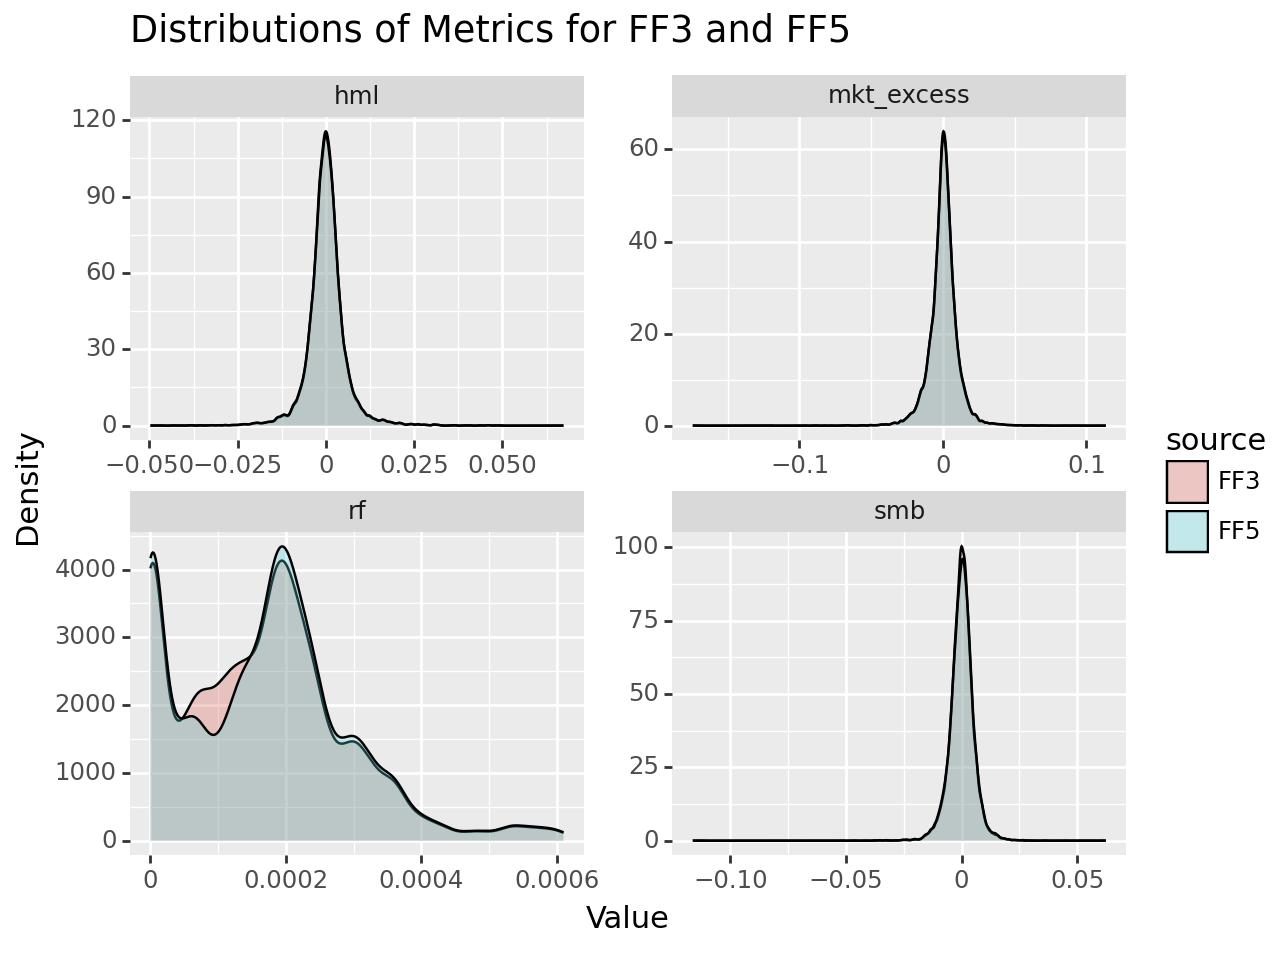

In [16]:
# plot distributions for a better comparison
from plotnine import ggplot, aes, geom_density, facet_wrap, labs

# Add a 'source' column to distinguish between the two dataframes
factors_ff3_daily['source'] = 'FF3'
factors_ff5_daily['source'] = 'FF5'

# Combine the two dataframes into one
combined_df = pd.concat([factors_ff3_daily, factors_ff5_daily])

# Melt the dataframe to get it in long format suitable for plotnine
melted_df = pd.melt(
    combined_df,
    id_vars=['date', 'source'],  # Keep 'date' and 'source' as identifier variables
    value_vars=['rf', 'mkt_excess', 'smb', 'hml'],  # Melt these columns
    var_name='metric',  # New column for the melted metric names
    value_name='value'  # New column for the values of those metrics
)

# Create the panel plot using plotnine
plot = (
    ggplot(melted_df, aes(x='value', fill='source')) +
    geom_density(alpha=0.3) +  # Density plot for distribution comparison
    facet_wrap('~metric', scales='free') +  # Facet by 'metric'
    labs(
        title='Distributions of Metrics for FF3 and FF5',
        x='Value',
        y='Density'
    )
)

# Display the plot
plot.draw()


Plotting the distributions like this suggests that `hml`, `smb` and `mkt_excess` are actually closer to each other between `ff3` and `ff5` than at first appears via `describe`. Meanwhile, the `rf` series, look a bit more different, with a bigger left "shoulder" for the `ff3` series.

In [17]:
from scipy.stats import skew, kurtosis

# List of metrics to compare
metrics = ['rf', 'mkt_excess', 'smb', 'hml']

# Function to calculate skewness and excess kurtosis
def calculate_statistics(df, metrics):
    stats = {}
    for metric in metrics:
        metric_skew = skew(df[metric])
        metric_kurtosis = kurtosis(df[metric], fisher=True)  # Excess kurtosis
        stats[metric] = {'Skewness': metric_skew, 'Excess Kurtosis': metric_kurtosis}
    return pd.DataFrame(stats).T

# Calculate statistics for FF3
ff3_stats = calculate_statistics(factors_ff3_daily, metrics)
ff3_stats['DataFrame'] = 'FF3'

# Calculate statistics for FF5
ff5_stats = calculate_statistics(factors_ff5_daily, metrics)
ff5_stats['DataFrame'] = 'FF5'

# Combine statistics into one DataFrame for comparison
combined_stats = pd.concat([ff3_stats, ff5_stats])
combined_stats = combined_stats.sort_index()

# Display the results
print(combined_stats)

            Skewness  Excess Kurtosis DataFrame
hml         0.303846        11.739646       FF3
hml         0.302869        11.350459       FF5
mkt_excess -0.539322        15.892067       FF3
mkt_excess -0.530685        15.649900       FF5
rf          0.725936         0.729246       FF3
rf          0.644119         0.567103       FF5
smb        -0.839628        21.028116       FF3
smb        -0.705601        18.325047       FF5


`rf` and `smb` for `ff3` do seem to have higher skewness and excess kurtosis vs. `ff5`. This makes sense given the "shoulder" we see for `rf`. It's interesting that the skewness and kurtosis differences for `smb` don't really show up well in the density plots.